In [1]:
# ------------------------------------------------------------
# Configuración Inicial del Entorno
# ------------------------------------------------------------
import sys
import os

# Ruta base del proyecto (sube un nivel desde el directorio actual)
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
SRC_PATH = os.path.join(BASE_DIR, "src")

# Verificar si `src` está en sys.path, si no, agregarlo
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)
    print(f"'src' agregado a sys.path: {SRC_PATH}")

# Verificar que la carpeta `loaders` exista dentro de `src`
loaders_path = os.path.join(SRC_PATH, "loaders")
if not os.path.exists(loaders_path):
    raise FileNotFoundError(f"No se encontró la carpeta 'loaders' en {SRC_PATH}. Verifica la estructura del proyecto.")

'src' agregado a sys.path: /Users/maximilianocruz/Documents/GitHub/practicos-rag/src


In [2]:
# ------------------------------------------------------------
# Importar módulos necesarios
# ------------------------------------------------------------
try:
    from loaders.pdf_processor import process_pdf_directly
    from loaders.table_review import process_and_review_tables
    from loaders.pdf_inspector import inspect_pdf_content
    print("Módulos importados correctamente.")
except ModuleNotFoundError as e:
    print(f"Error al importar módulos: {e}")
    print("--- Rutas actuales en sys.path ---")
    for path in sys.path:
        print(path)
    raise

Módulos importados correctamente.


In [3]:
# ------------------------------------------------------------
# Configurar las rutas de trabajo y mostrar detalles de los PDFs
# ------------------------------------------------------------
import pdfplumber

print("\n--- Configurando las rutas de trabajo ---")
CAPITULOS_DIR = os.path.join(BASE_DIR, "data/capitulos")
if not os.path.exists(CAPITULOS_DIR):
    raise FileNotFoundError(f"No se encontró el directorio 'data/capitulos' en {BASE_DIR}.")

# Obtener todos los PDFs en el directorio
pdf_paths = [
    os.path.join(CAPITULOS_DIR, file)
    for file in os.listdir(CAPITULOS_DIR)
    if file.endswith(".pdf")
]

# Mostrar resumen inicial de los archivos PDF y su cantidad de páginas
print(f"\n--- {len(pdf_paths)} PDFs encontrados en '{CAPITULOS_DIR}' ---")
for idx, pdf_path in enumerate(pdf_paths, start=1):
    try:
        with pdfplumber.open(pdf_path) as pdf:
            page_count = len(pdf.pages)
            print(f"{idx}. {os.path.basename(pdf_path)} - {page_count} páginas")
    except Exception as e:
        print(f"{idx}. {os.path.basename(pdf_path)} - Error al contar páginas: {e}")


--- Configurando las rutas de trabajo ---

--- 22 PDFs encontrados en '/Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos' ---
1. capitulo6.pdf - 110 páginas
2. capitulo15.pdf - 46 páginas
3. capitulo14.pdf - 38 páginas
4. capitulo7.pdf - 21 páginas
5. capitulo5.pdf - 53 páginas
6. capitulo16.pdf - 124 páginas
7. capitulo17.pdf - 66 páginas
8. capitulo4.pdf - 262 páginas
9. capitulo13.pdf - 20 páginas
10. capitulo12.pdf - 71 páginas
11. capitulo1.pdf - 4 páginas
12. capitulo3.pdf - 38 páginas
13. capitulo10.pdf - 76 páginas
14. capitulo11.pdf - 99 páginas
15. capitulo2.pdf - 78 páginas
16. capitulo20.pdf - 13 páginas
17. capitulo21.pdf - 44 páginas
18. capitulo22.pdf - 5 páginas
19. capitulo9.pdf - 115 páginas
20. capitulo8.pdf - 223 páginas
21. capitulo19.pdf - 4 páginas
22. capitulo18.pdf - 178 páginas


In [4]:
# ------------------------------------------------------------
# Procesar PDFs directamente
# ------------------------------------------------------------
print("\n--- Procesando TODOS los PDFs en el directorio ---")
results = process_pdf_directly(pdf_paths)

# Mostrar resultados del procesamiento
print("\n--- Resumen del procesamiento ---")
for pdf, data in results.items():
    print(f"{os.path.basename(pdf)}: {data['total_paginas']} páginas, {data['total_bloques']} bloques de texto, {data['total_tablas']} tablas.")


--- Procesando TODOS los PDFs en el directorio ---

--- Iniciando procesamiento de 22 archivos PDF ---

[1/22] Procesando archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo6.pdf
--- Estadísticas para capitulo6.pdf ---
Páginas: 110, Bloques de texto: 4440, Tablas: 81

[2/22] Procesando archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo15.pdf
--- Estadísticas para capitulo15.pdf ---
Páginas: 46, Bloques de texto: 2058, Tablas: 41

[3/22] Procesando archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo14.pdf
--- Estadísticas para capitulo14.pdf ---
Páginas: 38, Bloques de texto: 1623, Tablas: 17

[4/22] Procesando archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo7.pdf
--- Estadísticas para capitulo7.pdf ---
Páginas: 21, Bloques de texto: 1003, Tablas: 6

[5/22] Procesando archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos

In [5]:
# ------------------------------------------------------------
# Revisar tablas en documentos seleccionados y limitar cantidad
# ------------------------------------------------------------

# Lista de documentos a revisar y el número máximo de tablas por documento
documents_to_review = {
    "capitulo7.pdf": 3,  # Revisar hasta 3 tablas del documento capitulo7.pdf
    "capitulo14.pdf": 3,  # Revisar hasta 3 tablas del documento capitulo14.pdf
    "capitulo19.pdf": 3,  # Revisar hasta 3 tablas del documento capitulo19.pdf
    "capitulo22.pdf": 2,  # Revisar hasta 2 tablas del documento capitulo22.pdf
}

print("\n--- Revisando tablas en los documentos seleccionados ---")

# Iterar sobre cada documento y su límite de tablas
for pdf_name, max_tables in documents_to_review.items():
    # Construir la ruta completa del documento
    pdf_file = os.path.join(CAPITULOS_DIR, pdf_name)
    
    # Verificar si el archivo existe
    if not os.path.exists(pdf_file):
        print(f"Archivo no encontrado: {pdf_name}, saltando...")
        continue

    print(f"\nRevisando tablas en {pdf_name} (límite: {max_tables} tablas)")

    try:
        # Llamar a la función con el límite de tablas especificado
        tables = process_and_review_tables(pdf_file, max_tables=max_tables)
        
        # Mostrar el resultado del procesamiento
        print(f"Se procesaron {len(tables)} tablas en {pdf_name} (límite era {max_tables})")
    except Exception as e:
        # Capturar y mostrar cualquier error
        print(f"Error al procesar {pdf_name}: {e}")
    
    print("\n" + "="*80 + "\n")


--- Revisando tablas en los documentos seleccionados ---

Revisando tablas en capitulo7.pdf (límite: 3 tablas)

Procesando archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo7.pdf

Tabla 1 detectada en la página 3:
Longitud de onda (nm)	Absorbancia
280 - 289	0,15
290 - 299	0,13
300 - 359	0,08
360 - 400	0,02

Tabla 2 detectada en la página 12:
Densidad a 15°C	0,920 - 0,935
Índice de refracción a 20°C	1,470 - 1,480
Índice de saponificación mg KOH/g	189 - 194
Índice de yodo g/100g aceite	140 - 175

Tabla 3 detectada en la página 12:
Ácido palmítico (%)	C16:0	5 - 12
Ácido esteárico(%)	C18:0	1 - 4,5
Ácido oleico (omega-9) (%)	(18:1 n-9)	9 - 18
Ácido linoleico (omega-6) (%)	(18:2 n-6)	45 - 75
Ácido αlinolénico (omega-3) (%)	(18:3 n-3)	13 - 27

Límite de 3 tablas alcanzado para /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo7.pdf
Se procesaron 3 tablas en capitulo7.pdf (límite era 3)



Revisando tablas en capitulo14.pdf (límit

In [6]:
# ------------------------------------------------------------
# Inspeccionar contenido de los PDFs con un límite de caracteres
# ------------------------------------------------------------
print("\n--- Inspeccionando contenido de los PDFs con límite de caracteres ---")
inspect_pdf_content(CAPITULOS_DIR, pdf_paths, num_pages_limit=5, char_limit=500)


--- Inspeccionando contenido de los PDFs con límite de caracteres ---

--- Inspeccionando: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo1.pdf ---

--- Página 1 ---
CAPÍTULO I
DISPOSICIONES GENERALES
Artículo 1
Toda persona, firma comercial o establecimiento que elabore, fraccione, conserve, transporte,
expenda, exponga, importe o exporte alimentos, condimentos, bebidas o primeras materias
correspondientes a los mismos y aditivos alimentarios debe cumplir con las disposiciones del
presente Código.
Artículo 2 - (Dec ME y SyAS 2092, 10.10.91)
Sustitúyese el texto del artículo 2º del Anexo I del Decreto Nº 2126/71 por el siguiente:
"Todos los alimentos, condim

--------------------------------------------------------------------------------
--- Página 2 ---
Artículo 6
A los efectos de este Código se establecen las siguientes definiciones:
1. Consumidor: Toda persona o grupo de personas o institución que se procure alimentos para
consumo propio o de terceros

In [7]:
from loaders.metadata_processor import process_pdfs_with_validated_metadata

# ------------------------------------------------------------
# Procesar los PDFs y generar datos enriquecidos
# ------------------------------------------------------------
print("\n--- Procesando PDFs y generando datos enriquecidos ---")
data_enriched = process_pdfs_with_validated_metadata(pdf_paths, verbose=False)


--- Procesando PDFs y generando datos enriquecidos ---


In [8]:
# ------------------------------------------------------------
# Mostrar Resumen Global
# ------------------------------------------------------------
def mostrar_resumen_global(data_enriched, max_pdfs=5):
    """
    Muestra un resumen global del procesamiento de PDFs.

    Args:
        data_enriched (dict): Datos procesados enriquecidos.
        max_pdfs (int): Número máximo de PDFs a mostrar en el resumen.
    """
    print("\n--- Resumen Global del Procesamiento ---")
    for idx, (pdf_path, pdf_data) in enumerate(data_enriched.items(), start=1):
        total_paginas = len(pdf_data.get('paginas', []))
        total_capitulos = sum(
            1 for p in pdf_data['paginas'] for c in p['contenido']
            if c['tipo'] == 'texto' and 'CAPÍTULO' in c['texto']
        )
        total_tablas = sum(
            1 for p in pdf_data['paginas'] for c in p['contenido']
            if c['tipo'] == 'tabla'
        )

        print(f"\nArchivo {idx}: {os.path.basename(pdf_path)}")
        print(f"  Total de páginas procesadas: {total_paginas}")
        print(f"  Total de capítulos detectados: {total_capitulos}")
        print(f"  Total de tablas detectadas: {total_tablas}")

        if idx >= max_pdfs:
            print("... (se han procesado más archivos, pero se limitan los resultados mostrados)")
            break


# Llama a la función con un límite de 5 PDFs para mostrar
mostrar_resumen_global(data_enriched, max_pdfs=5)


--- Resumen Global del Procesamiento ---

Archivo 1: capitulo6.pdf
  Total de páginas procesadas: 110
  Total de capítulos detectados: 1
  Total de tablas detectadas: 81

Archivo 2: capitulo15.pdf
  Total de páginas procesadas: 46
  Total de capítulos detectados: 1
  Total de tablas detectadas: 41

Archivo 3: capitulo14.pdf
  Total de páginas procesadas: 38
  Total de capítulos detectados: 1
  Total de tablas detectadas: 17

Archivo 4: capitulo7.pdf
  Total de páginas procesadas: 21
  Total de capítulos detectados: 0
  Total de tablas detectadas: 6

Archivo 5: capitulo5.pdf
  Total de páginas procesadas: 53
  Total de capítulos detectados: 1
  Total de tablas detectadas: 72
... (se han procesado más archivos, pero se limitan los resultados mostrados)


In [9]:
from loaders.metadata_verification import verificar_metadatos_guardados

# ------------------------------------------------------------
# Verificar metadatos guardados con límites
# ------------------------------------------------------------
print("\n--- Verificando Metadatos Guardados ---")
verificar_metadatos_guardados(data_enriched, max_files=3, max_pages=2, max_blocks=5)


--- Verificando Metadatos Guardados ---

=== Verificación de Metadatos Guardados ===

Archivo 1: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo6.pdf
Total de páginas procesadas: 110

--- Página 1 ---
[Texto 1] Capítulo: CAPÍTULO VI, Artículo: No identificado, Longitud: 11, Contenido: CAPÍTULO VI...
[Texto 2] Capítulo: CAPÍTULO VI, Artículo: No identificado, Longitud: 26, Contenido: ALIMENTOS CÁRNEOS Y AFINES...
[Texto 3] Capítulo: CAPÍTULO VI, Artículo: No identificado, Longitud: 37, Contenido: CARNES DE CONSUMO FRESCAS Y ENVASADAS...
[Texto 4] Capítulo: CAPÍTULO VI, Artículo: Artículo 247, Longitud: 59, Contenido: Artículo 247 (Resolución Conjunta SPReI y SAV N° 1...
[Texto 5] Capítulo: CAPÍTULO VI, Artículo: Artículo 247, Longitud: 89, Contenido: Con la denominación genérica de carne, se entiende...

--- Página 2 ---
[Texto 1] Capítulo: CAPÍTULO VI, Artículo: Artículo 250, Longitud: 12, Contenido: Artículo 250...
[Texto 2] Capítulo: CAPÍTULO VI, Artícu

In [10]:
# ------------------------------------------------------------
# Importar módulos necesarios
# ------------------------------------------------------------
from loaders.review_tools import revisar_estructuras_generadas, revisar_paginas_especificas

# ------------------------------------------------------------
# Revisar ejemplos de estructuras generadas
# ------------------------------------------------------------
print("\n--- Revisando ejemplos de estructuras generadas ---")
revisar_estructuras_generadas(data_enriched, num_ejemplos=3)


--- Revisando ejemplos de estructuras generadas ---

--- Ejemplo de estructuras generadas tras procesar los PDFs ---


Archivo: capitulo6.pdf
Total de páginas procesadas: 110

--- Página 1 ---

--- Verificando bloque de contenido ---
Llaves encontradas: ['id', 'tipo', 'texto', 'longitud', 'capitulo', 'articulo', 'pagina']

Ejemplo de texto narrativo:
Capítulo: CAPÍTULO VI
Artículo: No identificado
Página: 1
Longitud: 11 caracteres
Contenido: CAPÍTULO VI

--- Verificando bloque de contenido ---
Llaves encontradas: ['id', 'tipo', 'texto', 'longitud', 'capitulo', 'articulo', 'pagina']

Ejemplo de texto narrativo:
Capítulo: CAPÍTULO VI
Artículo: No identificado
Página: 1
Longitud: 26 caracteres
Contenido: ALIMENTOS CÁRNEOS Y AFINES

--- Verificando bloque de contenido ---
Llaves encontradas: ['id', 'tipo', 'texto', 'longitud', 'capitulo', 'articulo', 'pagina']

Ejemplo de texto narrativo:
Capítulo: CAPÍTULO VI
Artículo: No identificado
Página: 1
Longitud: 37 caracteres
Contenido: CARNES D

In [11]:
# ------------------------------------------------------------
# Revisar páginas específicas
# ------------------------------------------------------------
print("\n--- Revisando páginas específicas del archivo seleccionado ---")
revisar_paginas_especificas(data_enriched, "capitulo13", paginas_deseadas=list(range(6, 11)))


--- Revisando páginas específicas del archivo seleccionado ---

--- Revisando páginas específicas ([6, 7, 8, 9, 10]) del archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo13.pdf ---


--- Página 6 ---

--- Verificando bloque de contenido ---
Llaves encontradas: ['id', 'tipo', 'texto', 'longitud', 'capitulo', 'articulo', 'pagina']

Ejemplo de texto narrativo:
Capítulo: CAPÍTULO XIII
Artículo: Artículo 1080
Página: 6
Longitud: 82 caracteres
Contenido: 8.2.4 La denominación de venta correspondiente a las diferentes clasificaciones de

--- Verificando bloque de contenido ---
Llaves encontradas: ['id', 'tipo', 'texto', 'longitud', 'capitulo', 'articulo', 'pagina']

Ejemplo de texto narrativo:
Capítulo: CAPÍTULO XIII
Artículo: Artículo 1080
Página: 6
Longitud: 53 caracteres
Contenido: cervezas debe tener el mismo realce y tamaño de letra

--- Verificando bloque de contenido ---
Llaves encontradas: ['id', 'tipo', 'texto', 'longitud', 'capitulo', 'articulo'

# Chunking

In [12]:
# ------------------------------------------------------------
# Importar módulos necesarios
# ------------------------------------------------------------
from chunking.separated_chunker import chunk_documents_separately
from chunking.chunk_verifier import verificar_chunks_narrativos_completos, verificar_chunks_tablas_completos
from chunking.chunk_analysis import analizar_chunks_narrativos, analizar_chunks_tablas, calcular_estadisticas_chunks_por_capitulo

In [13]:
# ------------------------------------------------------------
# Validación de Datos Enriquecidos
# ------------------------------------------------------------
print("\n--- Verificando Datos Enriquecidos ---")
print(f"Total de archivos procesados: {len(data_enriched)}")
for archivo, contenido in data_enriched.items():
    print(f"Archivo: {archivo}, Total de páginas: {len(contenido['paginas'])}")


--- Verificando Datos Enriquecidos ---
Total de archivos procesados: 22
Archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo6.pdf, Total de páginas: 110
Archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo15.pdf, Total de páginas: 46
Archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo14.pdf, Total de páginas: 38
Archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo7.pdf, Total de páginas: 21
Archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo5.pdf, Total de páginas: 53
Archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo16.pdf, Total de páginas: 124
Archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo17.pdf, Total de páginas: 66
Archivo: /Users/maximilianocruz/Documents/GitHub/practicos-rag/data/capitulos/capitulo4.pdf, Total de páginas: 262
Archivo:

In [14]:
# ------------------------------------------------------------
# Generar Chunks Separados
# ------------------------------------------------------------
print("\n--- Generando Chunks Narrativos y de Tablas ---")
chunks_narrativos, chunks_tablas = chunk_documents_separately(data_enriched, chunk_size=3000)

# Verificar resultados
print(f"Total de chunks narrativos: {len(chunks_narrativos)}")
print(f"Total de chunks de tablas: {len(chunks_tablas)}")


--- Generando Chunks Narrativos y de Tablas ---
Total de chunks narrativos: 1350
Total de chunks de tablas: 1101


In [15]:
# ------------------------------------------------------------
# Verificar Ejemplos de Chunks
# ------------------------------------------------------------
verificar_chunks_narrativos_completos(chunks_narrativos, num_chunks=3)
verificar_chunks_tablas_completos(chunks_tablas, num_chunks=3)


--- Verificando Chunks Narrativos Completos ---

--- Chunk Narrativo Completo 1 ---
Capítulo: CAPÍTULO VI
Metadatos: {'archivo': 'capitulo6.pdf', 'paginas_inicial': 1, 'paginas_final': 2, 'total_caracteres': 2974}

Contenido Completo:
CAPÍTULO VI
ALIMENTOS CÁRNEOS Y AFINES
CARNES DE CONSUMO FRESCAS Y ENVASADAS
Artículo 247 (Resolución Conjunta SPReI y SAV N° 12-E/2017)
Con la denominación genérica de carne, se entiende la parte comestible de los músculos de
vacunos, bubalinos, porcinos, ovinos, caprinos, llamas, conejos domésticos, nutrias de criadero,
pollos, pollas, gallos, gallinas, pavitos, pavitas, pavos, pavas, patos domésticos, gansos
domésticos y codornices, declarados aptos para la alimentación humana por la inspección
veterinaria oficial antes y después de la faena.
Con la misma definición se incluyen a los animales silvestres de caza o criados en cautiverio,
pescados, crustáceos, moluscos y otras especies comestibles.
Por extensión se considera carne al diafragma y músculos

In [16]:
# ------------------------------------------------------------
# Analizar Estadísticas Generales de los Chunks
# ------------------------------------------------------------
print("\n--- Analizando Estadísticas de los Chunks Narrativos ---")
estadisticas_narrativos = analizar_chunks_narrativos(chunks_narrativos)
print(f"  Total de chunks: {estadisticas_narrativos['total_chunks']}")
print(f"  Total de caracteres: {estadisticas_narrativos['total_caracteres']}")
print(f"  Promedio de caracteres por chunk: {estadisticas_narrativos['promedio_caracteres']:.2f}")

print("\n--- Analizando Estadísticas de los Chunks de Tablas ---")
estadisticas_tablas = analizar_chunks_tablas(chunks_tablas)
print(f"  Total de chunks de tablas: {estadisticas_tablas['total_chunks']}")
print(f"  Total de filas: {estadisticas_tablas['total_filas']}")
print(f"  Promedio de filas por tabla: {estadisticas_tablas['promedio_filas']:.2f}")
print(f"  Promedio de columnas por tabla: {estadisticas_tablas['promedio_columnas']:.2f}")


--- Analizando Estadísticas de los Chunks Narrativos ---
  Total de chunks: 1350
  Total de caracteres: 4059630
  Promedio de caracteres por chunk: 3007.13

--- Analizando Estadísticas de los Chunks de Tablas ---
  Total de chunks de tablas: 1101
  Total de filas: 15425
  Promedio de filas por tabla: 14.01
  Promedio de columnas por tabla: 3.54



--- Generando Histogramas para Chunks Narrativos ---


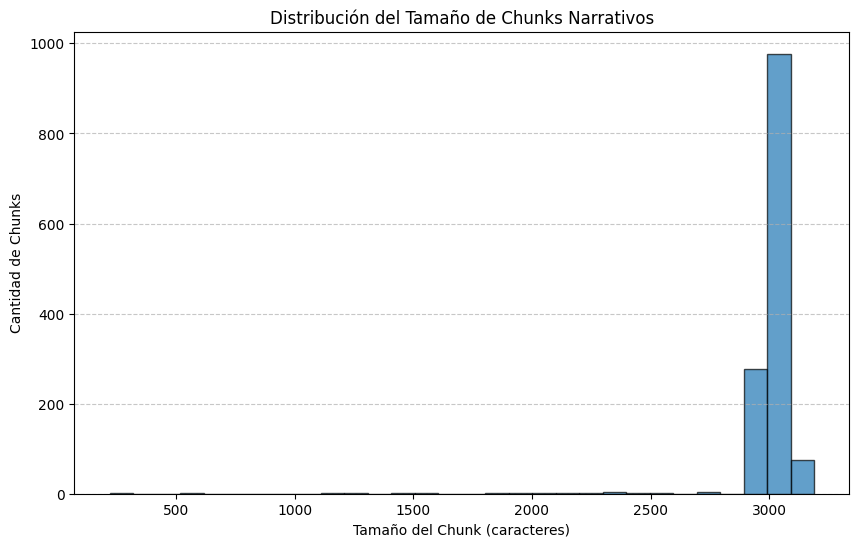


--- Generando Histogramas para Chunks de Tablas ---


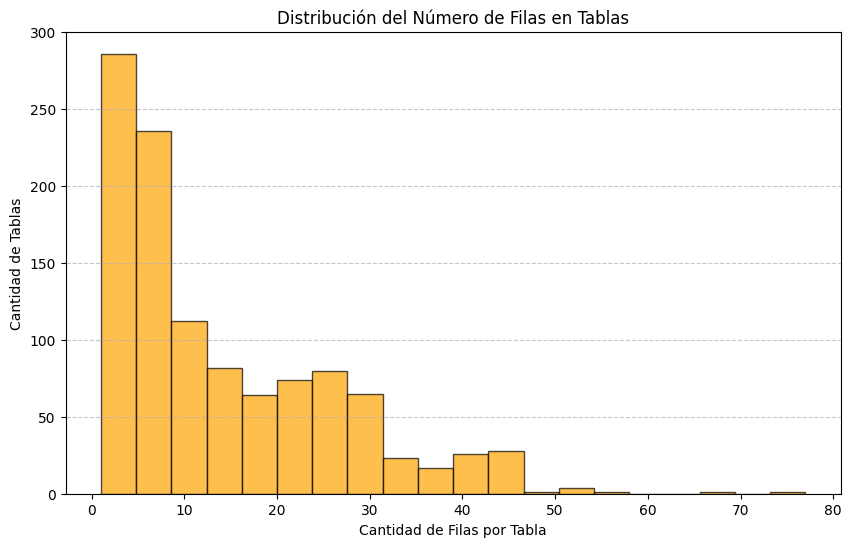

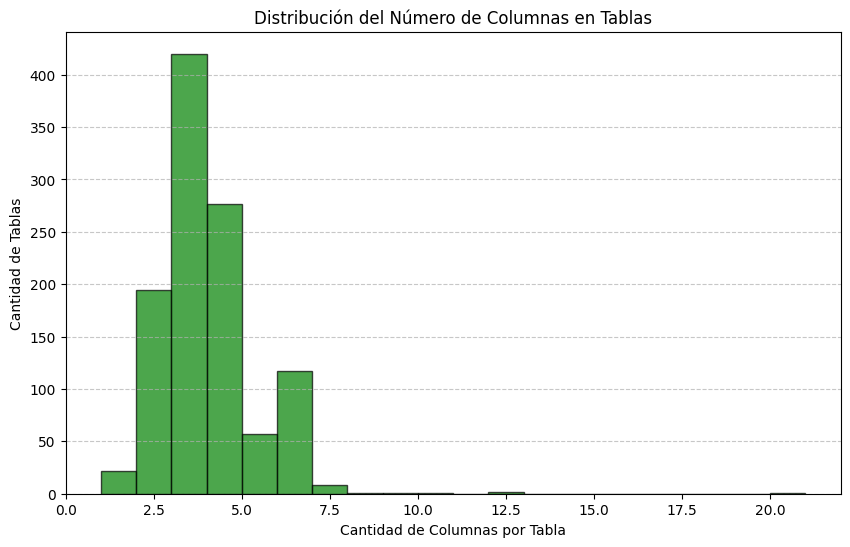

In [17]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Histograma para Chunks Narrativos (Tamaño en Caracteres)
# ------------------------------------------------------------
def generar_histograma_narrativos(chunks_narrativos):
    tamaños = [len(chunk["texto"]) for chunk in chunks_narrativos]

    plt.figure(figsize=(10, 6))
    plt.hist(tamaños, bins=30, edgecolor='black', alpha=0.7)
    plt.title("Distribución del Tamaño de Chunks Narrativos")
    plt.xlabel("Tamaño del Chunk (caracteres)")
    plt.ylabel("Cantidad de Chunks")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# ------------------------------------------------------------
# Histograma para Chunks de Tablas (Filas y Columnas)
# ------------------------------------------------------------
def generar_histograma_tablas(chunks_tablas):
    filas = [chunk["metadatos"]["filas"] for chunk in chunks_tablas]
    columnas = [chunk["metadatos"]["columnas"] for chunk in chunks_tablas]

    # Histograma de Filas
    plt.figure(figsize=(10, 6))
    plt.hist(filas, bins=20, color='orange', edgecolor='black', alpha=0.7)
    plt.title("Distribución del Número de Filas en Tablas")
    plt.xlabel("Cantidad de Filas por Tabla")
    plt.ylabel("Cantidad de Tablas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Histograma de Columnas
    plt.figure(figsize=(10, 6))
    plt.hist(columnas, bins=20, color='green', edgecolor='black', alpha=0.7)
    plt.title("Distribución del Número de Columnas en Tablas")
    plt.xlabel("Cantidad de Columnas por Tabla")
    plt.ylabel("Cantidad de Tablas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# ------------------------------------------------------------
# Generar Histogramas
# ------------------------------------------------------------
print("\n--- Generando Histogramas para Chunks Narrativos ---")
generar_histograma_narrativos(chunks_narrativos)

print("\n--- Generando Histogramas para Chunks de Tablas ---")
generar_histograma_tablas(chunks_tablas)

# Embeddings

In [18]:
# Importar dependencias
from embedding.embedding_v2 import generate_embeddings_v2
from vector_store_client.vector_store_client_v2 import insert_embeddings_v2
from qdrant_client import QdrantClient
from tqdm import tqdm

/Users/maximilianocruz/anaconda3/envs/ragas_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Modelo 'all-MiniLM-L6-v2' cargado correctamente.
Cargando el módulo 'embedding'
Modelo 'all-MiniLM-L6-v2' cargado correctamente.


In [19]:
# ------------------------------------------------------------
# Preparar los Chunks para Generar Embeddings
# ------------------------------------------------------------
# Combinar todos los chunks narrativos y de tablas en un solo formato estándar
all_chunks = []

for chunk in chunks_narrativos:
    all_chunks.append({
        "type": "narrative",
        "content": chunk["texto"],
        "metadata": chunk["metadatos"]
    })

for chunk in chunks_tablas:
    tabla_contenido = "\n".join(["\t".join(map(str, row)) for row in chunk["tabla"]])
    all_chunks.append({
        "type": "table",
        "content": tabla_contenido,
        "metadata": chunk["metadatos"]
    })

print(f"Total de chunks preparados para embeddings: {len(all_chunks)}")

Total de chunks preparados para embeddings: 2451


In [20]:
# ------------------------------------------------------------
# Generar Embeddings y Metadatos
# ------------------------------------------------------------
from embedding.embedding_v2 import generate_embeddings_v2

all_embeddings = generate_embeddings_v2(all_chunks)
print(f"Total de embeddings generados: {len(all_embeddings)}")

Generando embeddings para 2451 chunks...


Generando embeddings:  78%|███████▊  | 1911/2451 [00:40<00:11, 47.72chunk/s]


KeyboardInterrupt: 

In [21]:
# Separar embeddings y metadatos en listas separadas
embeddings_list = []
metadata_list = []

# Generar embeddings y metadatos con validaciones
for idx, entry in enumerate(all_embeddings):
    try:
        # Validar estructura esperada
        if "vector" in entry and "default" in entry["vector"]:
            embedding = entry["vector"]["default"]
        else:
            raise KeyError(f"Claves faltantes en vector en índice {idx}: {entry}")

        if "payload" in entry:
            payload = entry["payload"]
        else:
            raise KeyError(f"Clave 'payload' faltante en índice {idx}: {entry}")

        # Validar longitud del embedding
        if len(embedding) != 384:
            raise ValueError(f"Embedding en índice {idx} tiene tamaño incorrecto: {len(embedding)}")

        # Agregar a las listas
        embeddings_list.append(embedding)
        metadata_list.append(payload)
    except KeyError as e:
        print(f"Error procesando embedding en el índice {idx}: {e}")
    except Exception as e:
        print(f"Error inesperado en el índice {idx}: {e}")

# Validar resultados
print(f"Total embeddings después del bucle: {len(embeddings_list)}")
print(f"Ejemplo de embedding: {embeddings_list[0] if embeddings_list else 'Ninguno'}")
print(f"Total metadatos después del bucle: {len(metadata_list)}")
print(f"Ejemplo de metadata: {metadata_list[0] if metadata_list else 'Ninguno'}")

Total embeddings después del bucle: 2451
Ejemplo de embedding: [-0.038863979279994965, 0.026078233495354652, 0.04711836576461792, -0.05346646159887314, -0.05678756162524223, -0.011743293143808842, 0.0439816452562809, 0.05028247833251953, -0.02375801093876362, 0.006641828455030918, 0.05720642954111099, -0.13759715855121613, -0.006287077441811562, 0.039929330348968506, -0.029793718829751015, -0.061542995274066925, 0.0037060279864817858, 0.050435975193977356, 0.024154825136065483, 0.07523281127214432, 0.08104116469621658, 0.004938170313835144, -0.05114370957016945, 0.09421048313379288, -0.13874046504497528, -0.04357863962650299, -0.08110430091619492, 0.014787976630032063, -0.05069810897111893, -0.0889996886253357, -0.06340143829584122, 0.08082078397274017, 0.04209677502512932, -0.039308011531829834, 0.03940564766526222, -0.03729967400431633, -0.01961401104927063, -0.013008310459554195, 0.035436082631349564, 0.11955126374959946, -0.03879396244883537, 0.02530544623732567, -0.088684283196926

In [22]:
print(f"embeddings_list: {len(embeddings_list) if embeddings_list else 'None'}")
print(f"metadata_list: {len(metadata_list) if metadata_list else 'None'}")

embeddings_list: 2451
metadata_list: 2451


In [23]:
if any(len(embedding) != 384 for embedding in embeddings_list):
    print("Error: Algunos embeddings no tienen la dimensión adecuada.")

if any(not isinstance(metadata, dict) for metadata in metadata_list):
    print("Error: Algunos metadatos no tienen el formato adecuado.")

In [24]:
print("Ejemplo de embedding:", embeddings_list[0])
print("Ejemplo de metadato:", metadata_list[0])

Ejemplo de embedding: [-0.038863979279994965, 0.026078233495354652, 0.04711836576461792, -0.05346646159887314, -0.05678756162524223, -0.011743293143808842, 0.0439816452562809, 0.05028247833251953, -0.02375801093876362, 0.006641828455030918, 0.05720642954111099, -0.13759715855121613, -0.006287077441811562, 0.039929330348968506, -0.029793718829751015, -0.061542995274066925, 0.0037060279864817858, 0.050435975193977356, 0.024154825136065483, 0.07523281127214432, 0.08104116469621658, 0.004938170313835144, -0.05114370957016945, 0.09421048313379288, -0.13874046504497528, -0.04357863962650299, -0.08110430091619492, 0.014787976630032063, -0.05069810897111893, -0.0889996886253357, -0.06340143829584122, 0.08082078397274017, 0.04209677502512932, -0.039308011531829834, 0.03940564766526222, -0.03729967400431633, -0.01961401104927063, -0.013008310459554195, 0.035436082631349564, 0.11955126374959946, -0.03879396244883537, 0.02530544623732567, -0.08868428319692612, -0.018378473818302155, -0.05485314875

In [ ]:
# ------------------------------------------------------------
# Conectar a Qdrant
# ------------------------------------------------------------
from dotenv import load_dotenv
import os
from qdrant_client import QdrantClient

# Cargar las variables de entorno desde el archivo .env
load_dotenv()

# Leer las variables desde .env
QDRANT_URL = os.getenv("QDRANT_URL")
QDRANT_API_KEY = os.getenv("QDRANT_API_KEY")
INDEX_NAME = "embeddings-version-2"

# Validar que las variables se cargaron correctamente
if not QDRANT_URL or not QDRANT_API_KEY:
    raise ValueError("Las variables QDRANT_URL o QDRANT_API_KEY no están configuradas correctamente en el archivo .env")

print("Conectando a Qdrant...")
qdrant_client = QdrantClient(url=QDRANT_URL, api_key=QDRANT_API_KEY)
print("Conexión a Qdrant establecida con éxito.")

Conectando a Qdrant...
Conexión a Qdrant establecida con éxito.


In [ ]:
# Verificar detalles de la colección
collection_info = qdrant_client.get_collection(INDEX_NAME)
print(collection_info)

status=<CollectionStatus.GREEN: 'green'> optimizer_status=<OptimizersStatusOneOf.OK: 'ok'> vectors_count=None indexed_vectors_count=0 points_count=2451 segments_count=2 config=CollectionConfig(params=CollectionParams(vectors={'default': VectorParams(size=384, distance=<Distance.COSINE: 'Cosine'>, hnsw_config=None, quantization_config=None, on_disk=None, datatype=None, multivector_config=None)}, shard_number=1, sharding_method=None, replication_factor=1, write_consistency_factor=1, read_fan_out_factor=None, on_disk_payload=True, sparse_vectors=None), hnsw_config=HnswConfig(m=16, ef_construct=100, full_scan_threshold=10000, max_indexing_threads=0, on_disk=False, payload_m=None), optimizer_config=OptimizersConfig(deleted_threshold=0.2, vacuum_min_vector_number=1000, default_segment_number=0, max_segment_size=None, memmap_threshold=None, indexing_threshold=20000, flush_interval_sec=5, max_optimization_threads=None), wal_config=WalConfig(wal_capacity_mb=32, wal_segments_ahead=0), quantizati

In [27]:
for idx, (embedding, metadata) in enumerate(zip(embeddings_list, metadata_list)):
    point = {
        "id": idx,
        "vector": {"default": embedding},  # Clave 'default' requerida por Qdrant
        "payload": metadata
    }
    print(f"Punto {idx}: {point}")
    if idx == 0:  # Ver solo el primer punto para simplificar
        break

Punto 0: {'id': 0, 'vector': {'default': [-0.038863979279994965, 0.026078233495354652, 0.04711836576461792, -0.05346646159887314, -0.05678756162524223, -0.011743293143808842, 0.0439816452562809, 0.05028247833251953, -0.02375801093876362, 0.006641828455030918, 0.05720642954111099, -0.13759715855121613, -0.006287077441811562, 0.039929330348968506, -0.029793718829751015, -0.061542995274066925, 0.0037060279864817858, 0.050435975193977356, 0.024154825136065483, 0.07523281127214432, 0.08104116469621658, 0.004938170313835144, -0.05114370957016945, 0.09421048313379288, -0.13874046504497528, -0.04357863962650299, -0.08110430091619492, 0.014787976630032063, -0.05069810897111893, -0.0889996886253357, -0.06340143829584122, 0.08082078397274017, 0.04209677502512932, -0.039308011531829834, 0.03940564766526222, -0.03729967400431633, -0.01961401104927063, -0.013008310459554195, 0.035436082631349564, 0.11955126374959946, -0.03879396244883537, 0.02530544623732567, -0.08868428319692612, -0.018378473818302

In [ ]:
test_point = {
    "id": 1,
    "vector": {"default": embeddings_list[0]},  # Embedding bajo el nombre 'default'
    "payload": metadata_list[0]
}

response = qdrant_client.upsert(
    collection_name="embeddings-version-2",  # Nombre correcto de la colección
    points=[test_point]
)

print("Respuesta de inserción manual:", response)

Respuesta de inserción manual: operation_id=508 status=<UpdateStatus.COMPLETED: 'completed'>


In [29]:
print(type(embeddings_list[0]))
print(len(embeddings_list[0]))

<class 'list'>
384


In [ ]:
batch = [
    {
        "id": i,
        "vector": {"default": embeddings_list[i]},
        "payload": metadata_list[i]
    }
    for i in range(10)  # Prueba con los primeros 10 puntos
]

response = qdrant_client.upsert(
    collection_name="embeddings-version-2",
    points=batch
)
print("Respuesta de inserción de lote pequeño:", response)

Respuesta de inserción de lote pequeño: operation_id=509 status=<UpdateStatus.COMPLETED: 'completed'>


In [ ]:
# Verificar datos antes de insertar
if embeddings_list and metadata_list:
    print(f"Ejemplo de embedding: {embeddings_list[0][:5]}... (Tamaño: {len(embeddings_list[0])})")
    print(f"Ejemplo de payload: {metadata_list[0]}")

    print(f"Insertando {len(embeddings_list)} embeddings en la colección 'embeddings-version-2' en lotes de 100...")
    insert_embeddings_v2(
        client=qdrant_client,
        index_name="embeddings-version-2",
        embeddings=embeddings_list,
        metadata_list=metadata_list,
        batch_size=100
    )
    print("Embeddings generados e insertados en Qdrant con éxito.")
else:
    print("No hay embeddings o metadatos para insertar.")

Ejemplo de embedding: [-0.038863979279994965, 0.026078233495354652, 0.04711836576461792, -0.05346646159887314, -0.05678756162524223]... (Tamaño: 384)
Ejemplo de payload: {'type': 'narrative', 'content': 'CAPÍTULO VI\nALIMENTOS CÁRNEOS Y AFINES\nCARNES DE CONSUMO FRESCAS Y ENVASADAS\nArtículo 247 (Resolución Conjunta SPReI y SAV N° 12-E/2017)\nCon la denominación genérica de carne, se entiende la parte comestible de los músculos de\nvacunos, bubalinos, porcinos, ovinos, caprinos, llamas, conejos domésticos, nutrias de criadero,\npollos, pollas, gallos, gallinas, pavitos, pavitas, pavos, pavas, patos domésticos, gansos\ndomésticos y codornices, declarados aptos para la alimentación humana por la inspección\nveterinaria oficial antes y después de la faena.\nCon la misma definición se incluyen a los animales silvestres de caza o criados en cautiverio,\npescados, crustáceos, moluscos y otras especies comestibles.\nPor extensión se considera carne al diafragma y músculos de la lengua, no así

In [32]:
# ------------------------------------------------------------
# Validar Resultados
# ------------------------------------------------------------
print("\n--- Validación de Embeddings ---")
if all_embeddings:
    num_valid_embeddings = len(embeddings_list)
    print(f"Embeddings válidos: {num_valid_embeddings}/{len(all_chunks)}")
    print("Ejemplo de embedding:")
    print(f"Tipo: {metadata_list[0]['type']}")
    print(f"Contenido: {metadata_list[0]['content'][:100]}...")
    print(f"Embedding: {embeddings_list[0][:5]}...")  # Mostrar primeros valores
else:
    print("No se generaron embeddings.")


--- Validación de Embeddings ---
Embeddings válidos: 2451/2451
Ejemplo de embedding:
Tipo: narrative
Contenido: CAPÍTULO VI
ALIMENTOS CÁRNEOS Y AFINES
CARNES DE CONSUMO FRESCAS Y ENVASADAS
Artículo 247 (Resolució...
Embedding: [-0.038863979279994965, 0.026078233495354652, 0.04711836576461792, -0.05346646159887314, -0.05678756162524223]...


In [33]:
from embedding.embedding_v2 import generate_query_embedding
from vector_store_client.vector_store_search import search_embeddings, format_search_results

# ------------------------------------------------------------
# Definir la consulta y generar su embedding
# ------------------------------------------------------------
query = "¿Qué requisitos deben cumplir los alimentos para ser etiquetados correctamente en Argentina?"

# Generar embedding para la consulta
try:
    query_embedding = generate_query_embedding(query)

    # Validar el formato del embedding generado
    if not isinstance(query_embedding, list) or len(query_embedding) != 384:
        raise ValueError("El embedding de la consulta no tiene el formato esperado (lista con 384 dimensiones).")
    
    print(f"Tipo de query_embedding: {type(query_embedding)}")
    print(f"Tamaño de query_embedding: {len(query_embedding)}")
    print(f"Primeros valores: {query_embedding[:5]}")
except Exception as e:
    print(f"Error al generar el embedding de la consulta: {e}")
    raise

# ------------------------------------------------------------
# Realizar la búsqueda en Qdrant
# ------------------------------------------------------------
index_name = "embeddings-version-2"  # Nombre de la colección en Qdrant
limit = 5  # Número de resultados a devolver

try:
    print(f"Realizando búsqueda en la colección '{index_name}'...")
    results = search_embeddings(qdrant_client, index_name, query_embedding, limit=limit)
except Exception as e:
    print(f"Error al realizar la búsqueda en Qdrant: {e}")
    results = []

# ------------------------------------------------------------
# Formatear y mostrar los resultados
# ------------------------------------------------------------
if results:
    format_search_results(query, results)
else:
    print("No se encontraron resultados para la consulta.")

Generando embeddings para 1 chunks...


Generando embeddings: 100%|██████████| 1/1 [00:00<00:00,  4.29chunk/s]

Total de embeddings generados: 1
Tipo de query_embedding: <class 'list'>
Tamaño de query_embedding: 384
Primeros valores: [0.0014704960631206632, 0.03162452206015587, -0.02496214210987091, -0.05299336090683937, -0.021817844361066818]
Realizando búsqueda en la colección 'embeddings-version-2'...
query_embedding enviado: [0.0014704960631206632, 0.03162452206015587, -0.02496214210987091, -0.05299336090683937, -0.021817844361066818]... [374 dimensiones omitidas] ...[0.02229820378124714, 0.06649798154830933, -0.004405495245009661, 0.015362538397312164, -0.040046822279691696]
Error al realizar la búsqueda: Unknown arguments: ['vector']
No se encontraron resultados para la consulta.


In [34]:
print(f"query_embedding es de tipo: {type(query_embedding)} y longitud: {len(query_embedding)}")

query_embedding es de tipo: <class 'list'> y longitud: 384
